# Predicting Heart Disease using Machine Learning
This notebook looks into various data science and machine learning modules
We are going to take the following approach
1.Problem Definition
2.Data
3.Evaluation
4.Features
5.Modelling
6.Experimentation

## Problem Definition
In a Statement,
>Given clinical parameters about a patient,can we predict whether they have heart disease or not?

## Data
The original data came from Clevland data from UCI Machine learning Repository

## Evaluation
> If we can reach 99% accuracy at predicting whether a person has heart-disease or not during the proof of concept we will pursue the project

## Features

**Create Data Dictionary**
### This is where we will get the information about each feature inside the dataset
id (Unique id for each patient)
age (Age of the patient in years)
origin (place of study)
sex (Male/Female)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute



##  Preparing the Tools for Machine Learning
 We are going to use pandas,numpy,matplotlib,scikit-learn to implement

In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

# Step 1--
Now we Will Include the heart disease data set intially to preprocess the data to fit the data properly

In [2]:
df=pd.read_csv("heart.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.shape

(1025, 14)

## Data Exploration(Exploratory Data analysis)
The goal here is to find out more about the data and become a subject expert in the dataset you are working with

What questions are we trying to solve?
What kind of data do we have and how do we treat datatypes?
What's missing from the data and how do u deal with it?
Where are the outliers and why we should care about them?
How can u add change or remove features to get more of the data?


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# lets find out how many of each class are there
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

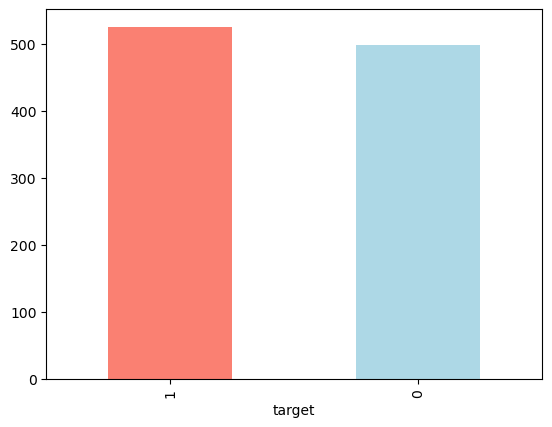

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
## The method to check whether there are any null values or we can say the missing values in the dataset is info() df.info()

In [10]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [12]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

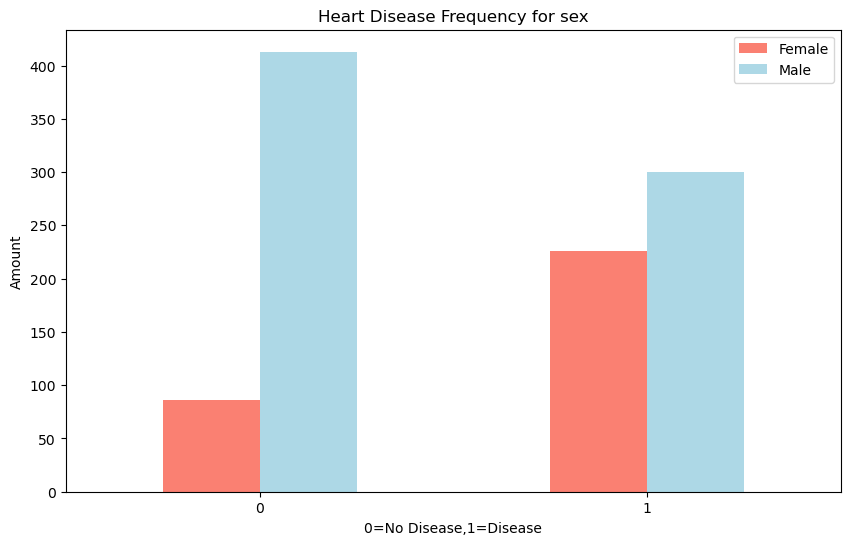

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0)

In [15]:

df["thalach"].value_counts()

thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart

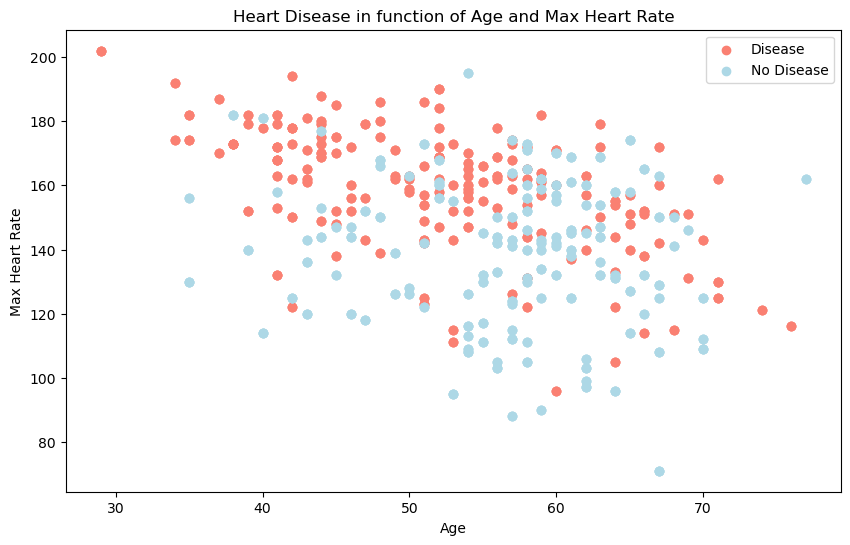

In [16]:
# Creating another figure 
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");
# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

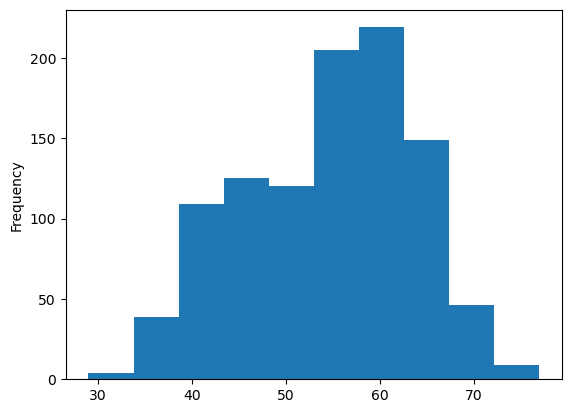

In [17]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [18]:
# Heart disease frequency with chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


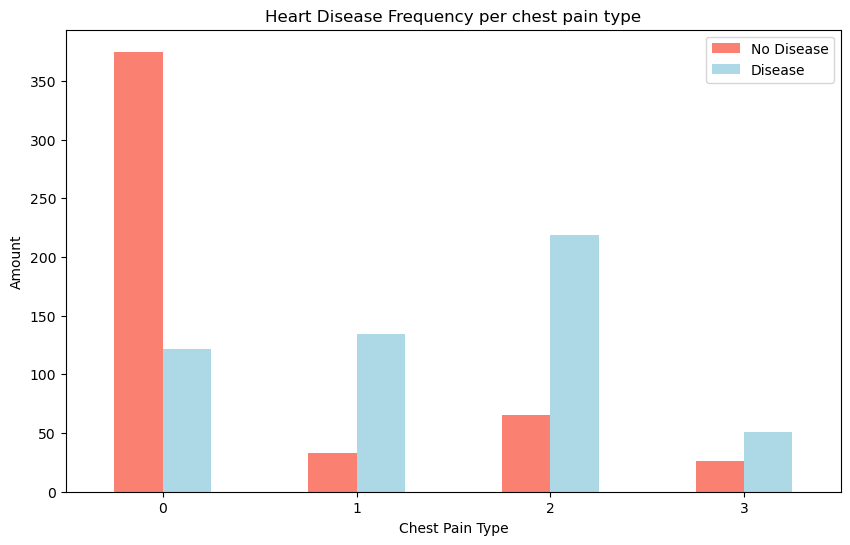

In [19]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);

# Add some communication
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
# Building a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [22]:
# Lets make our correlation matrix look prettier
import seaborn as sns

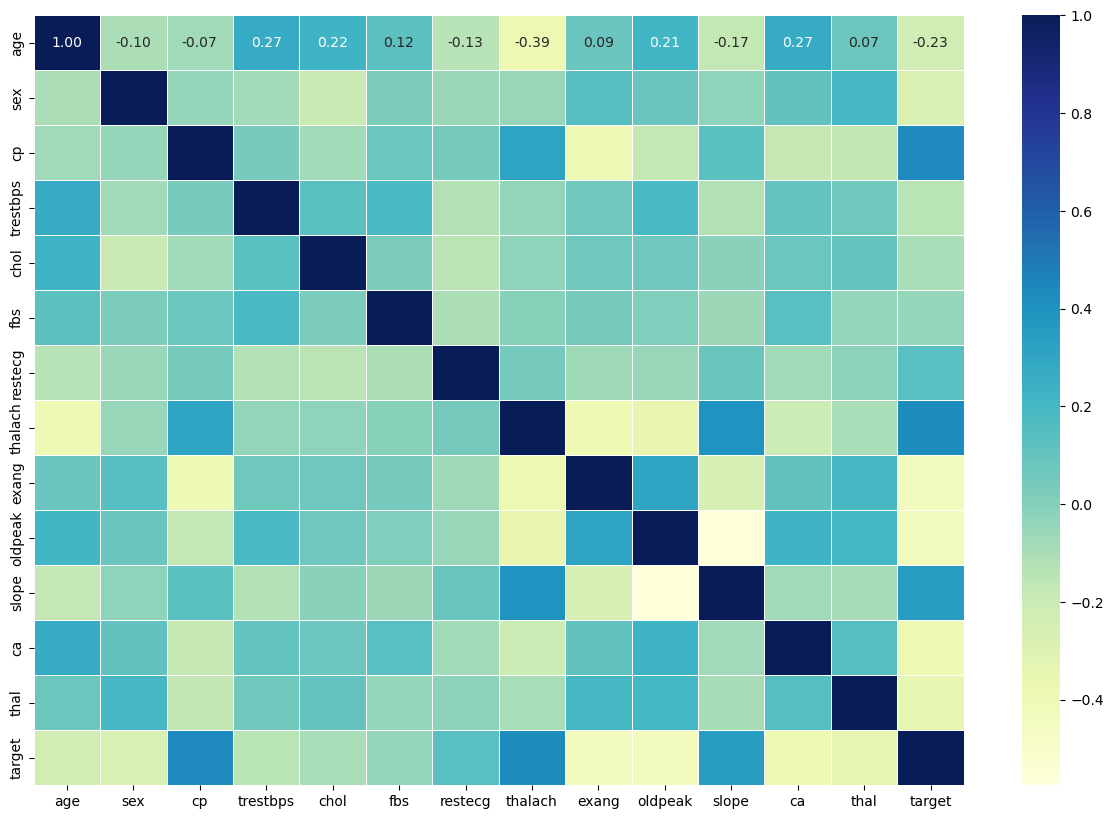

In [23]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

## Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
# Split data into X and Y
x=df.drop("target",axis=1)
y=df["target"]

In [26]:
x,y

(      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0      52    1   0       125   212    0        1      168      0      1.0   
 1      53    1   0       140   203    1        0      155      1      3.1   
 2      70    1   0       145   174    0        1      125      1      2.6   
 3      61    1   0       148   203    0        1      161      0      0.0   
 4      62    0   0       138   294    1        1      106      0      1.9   
 ...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 1020   59    1   1       140   221    0        1      164      1      0.0   
 1021   60    1   0       125   258    0        0      141      1      2.8   
 1022   47    1   0       110   275    0        0      118      1      1.0   
 1023   50    0   0       110   254    0        0      159      0      0.0   
 1024   54    1   0       120   188    0        1      113      0      1.4   
 
       slope  ca  thal  
 0         2   2     3  
 1         0

In [27]:
# Split the data into training and test data sets
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
x_train,len(x_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 835   49    1   2       118   149    0        0      126      0      0.8   
 137   64    0   0       180   325    0        1      154      1      0.0   
 534   54    0   2       108   267    0        0      167      0      0.0   
 495   59    1   0       135   234    0        1      161      0      0.5   
 244   51    1   2       125   245    1        0      166      0      2.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 700   41    1   2       130   214    0        0      168      0      2.0   
 71    61    1   0       140   207    0        0      138      1      1.9   
 106   51    1   0       140   299    0        1      173      1      1.6   
 270   43    1   0       110   211    0        1      161      0      0.0   
 860   52    1   0       112   230    0        1      160      0      0.0   
 
      slope  ca  thal  
 835      2   3     2  
 137      2   0     2  
 5

Now we got our data splitted into training and test sets
now the machine has to predict the output from the data patterns using a machine learning algorithm
Training is done on training set
Evaluation is done on test set

### We are going to try 3 different machine learning models/classifiers/algorithms to see which one gets more evaluation score 
1.Logistic Regression
2.K-Nearest Neighbours
3.Random Forest Classifier


In [29]:
# Put Models in dictionary
models={"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and Evaluates given machine learning models
    models:a dict of different Scikit-Learn machine learning model
    x_train:training data(no labels)
    y_train:training data(labels)
    x_test:test data(no labels)
    y_test:test data(labels)
    """
# Setting up random seed
    np.random.seed(42)
# Make a dictionary to keep model scores
    model_scores= {}
    for name,model in models.items():
        model.fit(x_train,y_train)
    # Evaluate 
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [30]:
model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\User\MileStone_Project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

## Model comparison

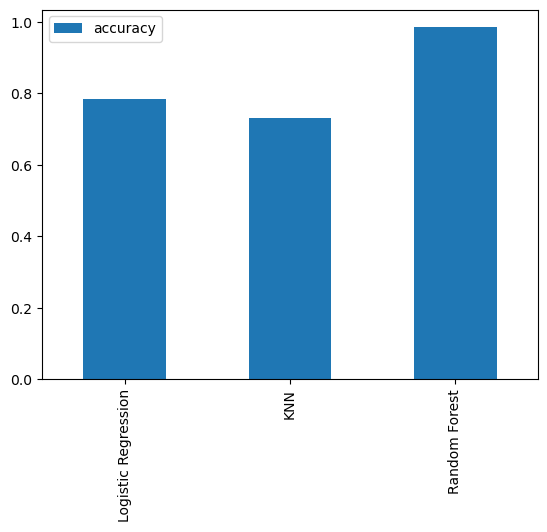

In [31]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we got Baseline Model and we know that models first predicitions are always very low so we need to improve the models prediction
Lets look at the following
## HyperParameter Tuning
## Feature importance
## Confusion Matrix
## Cross-Validation
## Precision
## Recall
## F1
## ROC Curve
## Classification Report
## Area under the curve

### HyperParameter Tuning(By Hand)

In [32]:
# Lets tune KNN
train_scores=[]
test_scores=[]
# Create a list of different values for n_neighbors
neighbors=range(1,21)
# Setup KNN instance
knn=KNeighborsClassifier()
# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the data
    knn.fit(x_train,y_train)
    #Updata the training scores list
    train_scores.append(knn.score(x_train,y_train))
    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [33]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [34]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

Maximum KNN score on the test data:98.536585%


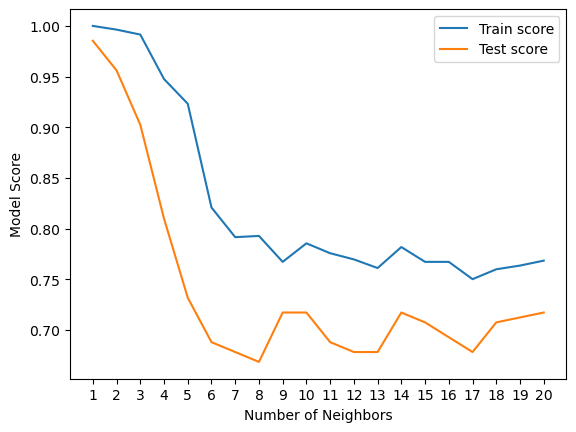

In [35]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:2f}%")

## HyperParameter Tuning using RandomizedSearchCV

In [36]:
# We are going to tune Logistic Regression and RandomForestClassifier using RandomizedSearchCV

In [37]:
# Create a Hyperparameter grid for Logistic Regression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
# Create a Hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_lead":np.arange(1,20,2)}

Now we got hyperparameter grids lets tune them using randomized search cv

In [38]:
# Tune Logistic Regression
np.random.seed(42)
# Setup RandomizedSearchCV for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
#Fit RandomizedSearchCV for logistic Regression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [40]:
rs_log_reg.score(x_test,y_test)

0.7853658536585366

In [41]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


# HyperParameter Tuning using GridSearchCV

In [42]:
# Different Hyperparameters for our logistic regression model
log_reg_grid={"C": np.logspace(-4,4,30),"solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
# Fit grid Hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [44]:
#Evaluate the gs_log_reg
gs_log_reg.score(x_test,y_test)

0.7853658536585366

# Evaluating our tuned machine Learning classfier,beyond accuracy
*ROC Curve
*Confusion Matrix
*Classification Report
*Precision
*Recall
*F1 score

In [45]:
# It would be great if we could use cross validation as well

In [46]:
y_preds=gs_log_reg.predict(x_test)

In [47]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

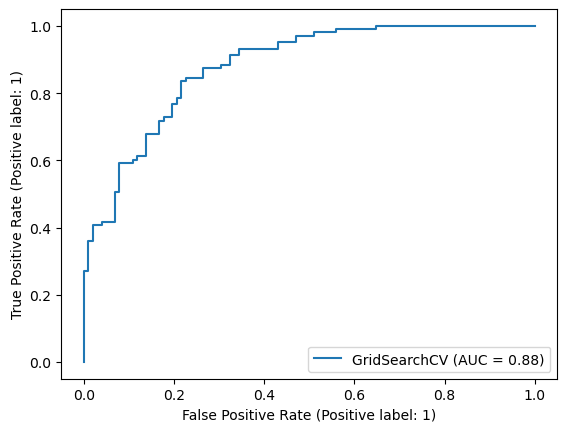

In [48]:
# Import ROC Curve function from the sklearn.metrics module
# Plot ROC Curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

In [49]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[71 31]
 [13 90]]


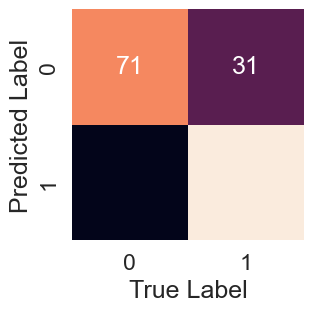

In [50]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborns heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_mat(y_test,y_preds)

Now we have got a ROC Curve now lets get Classification Report and recall and f1 score

In [51]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [52]:
# Calculate Evaluation Metrics using Cross Validation
# We will be using cross_val_score

In [53]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best parameters
clf=LogisticRegression(C=0.2433597178569418,solver="liblinear")

In [55]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc


array([0.87804878, 0.84390244, 0.87317073, 0.8195122 , 0.80487805])

In [56]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8439024390243903

In [57]:
# Cross-validated precison
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.84482759, 0.81196581, 0.84347826, 0.78813559, 0.78448276])

In [58]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8145780021766604

In [59]:
# Cross-validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.93333333, 0.9047619 , 0.92380952, 0.88571429, 0.85849057])

In [60]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9012219227313567

In [61]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1

array([0.88687783, 0.85585586, 0.88181818, 0.83408072, 0.81981982])

In [62]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8556904806073892

<Axes: title={'center': 'Cross-Validated classification metrics'}>

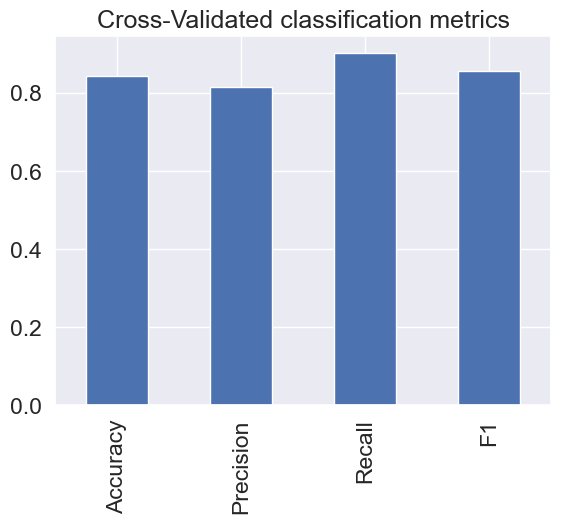

In [63]:
# Visualize Cross Validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,"Recall":cv_recall,"F1":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated classification metrics",legend=False)

## Feature Importance

### The Features which are most important to predict the output are called important features

# Feature importance is different for each model

## Lets find feature importance for logistic Regression

In [64]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [65]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [66]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [67]:
clf.coef_

array([[ 0.01575067, -1.26513838,  0.77534734, -0.01372186, -0.00699639,
        -0.14437765,  0.28403512,  0.03492739, -0.64220296, -0.62256924,
         0.46428626, -0.75326645, -0.91923674]])

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [69]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.015750667997707243,
 'sex': -1.2651383756206245,
 'cp': 0.7753473415640598,
 'trestbps': -0.013721861228384391,
 'chol': -0.00699638662425758,
 'fbs': -0.1443776467453102,
 'restecg': 0.2840351243423695,
 'thalach': 0.03492738594402375,
 'exang': -0.6422029636268358,
 'oldpeak': -0.6225692440091054,
 'slope': 0.464286256805781,
 'ca': -0.7532664545443779,
 'thal': -0.9192367411064556}

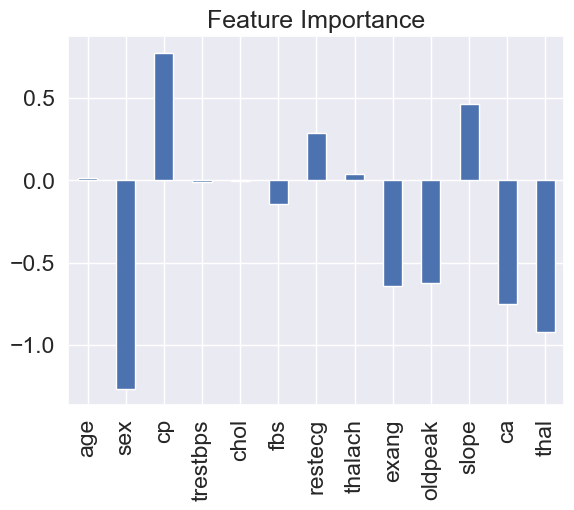

In [70]:
# Visualize Feature Importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [71]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,86,226
1,413,300


In [72]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340
